# Entwicklung der Kindersterblichkeitsrate 
Gruppe: Ajna Aliji und Melisa Dedukic


Fragen:
- Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
- Welche Länder haben derzeit die höchste bzw. niedrigste Kindersterblichkeitsrate?
- Bei welchen Ländern steigt die Kindersterblichkeitrate?
- Welche Regionen zeigen den grössten Rückgang in der Kindersterblichkeits?
- Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern? 

Quellen:
- https://childmortality.org/all-cause-mortality/data
- https://www.gapminder.org/data/documentation/gd005/  
- https://ourworldindata.org/population-sources 






## 1. Daten beschaffen und laden

In [2080]:
import pandas as pd
from matplotlib import pyplot as plt

In [2081]:
# loading the data
df = pd.read_csv('child-mortality.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Unter 5 Sterblichkeitsrate']) 
df.head()

,Gebiet,Code,Jahr,Unter 5 Sterblichkeitsrate
0,Afghanistan,AFG,2014,7.528273
1,Afghanistan,AFG,2015,7.267698
2,Afghanistan,AFG,2016,7.023421
3,Afghanistan,AFG,2017,6.791161
4,Afghanistan,AFG,2018,6.575211


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format, da jede Zeile eine Kombination aus Gebiet, Jahr und Sterblichkeitsrate repräsentiert.
- Für die Analyse werden die Daten ins Wide-Format transformiert: Durch pivotieren werden die Jahre zu Spaltenüberschriften und jede Zeile repräsentiert eine Region. Dies ermöglicht eine übersichtliche Darstellung und den direkten Vergleich der Werte über mehrere Jahre hinweg.
- Das Long-Format eignet sich besonders um die Daten zu filtern, sortieren und für Diagramme nutzen. Das Wide-Format ist dagegen besser, um die Werte zwischen verschiedenen Jahren oder Regionen direkt zu vergleichen.



In [2082]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Unter 5 Sterblichkeitsrate')
df_pivot.head()

Jahr,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.815998,7.528273,7.267698,7.023421,6.791161,6.575211,6.361594,6.155799,5.960755,5.767968
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.796442,7.577729,7.376779,7.170871,6.982090,6.792204,6.606280,6.420107,6.232287,6.053605
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.046844,0.992791,0.957540,0.940036,0.933377,0.934290,0.938541,0.942817,0.945740,0.943802
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604556,2.566788,2.530254,2.491073,2.447241,2.398036,2.346064,2.291044,2.233761,2.175275
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393545,0.375111,0.355793,0.339233,0.324281,0.311451,0.299068,0.288192,0.278005,0.268771


## 3. Statistik der Roh-Daten (Analyse im Longformat)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 233 verschiedene Gebiete
- Die Spalte *Codes* enthält 203  verschiedene Codes
- Es sind Daten zwischen 1751 und 2022 vorhanden. Ab dem Jahr 1990 sind die Daten komplett.
- Die Unter 5 Sterblichkeitsrate streut zwischen 0,15 und 68 Todesfälle pro 100 Lebendgeburten.
- Die meisten Länder haben eine sehr niedrige Sterblichkeitsrate unter 5 Jahren (0–3 Todesfälle pro 100 Geburten). Höhere Raten sind selten und kommen nur in wenigen Ländern vor.


In [2083]:
df.dtypes

Gebiet                         object
Code                           object
Jahr                            int64
Unter 5 Sterblichkeitsrate    float64
dtype: object

### 3.1 Analyse Gebiete

In [2084]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  233


In [2085]:
# Anzahl Datenpunkte pro Gebiet
df['Gebiet'].value_counts()

Gebiet
Sweden                                       272
Austria                                      213
France                                       207
Belgium                                      189
Denmark                                      188
                                            ... 
Lower-middle-income countries                 33
South-Eastern Asia (SDG)                      33
Southern Asia (SDG)                           33
Sub-Saharan Africa (SDG)                      33
Eastern Asia and South-Eastern Asia (SDG)     33
Name: count, Length: 233, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

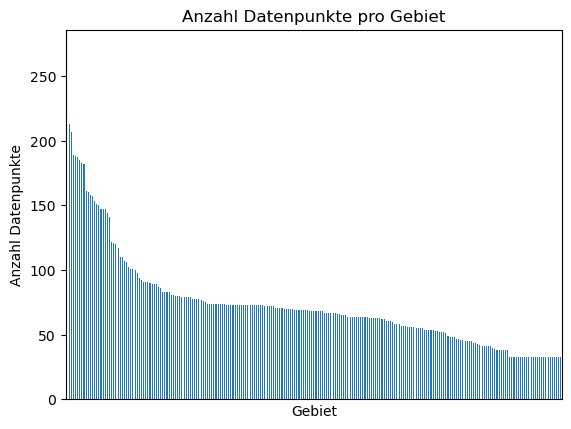

In [2086]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [2087]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  203


In [2088]:
# Anzahl Datenpunkte pro Gebiet
df['Code'].value_counts()

Code
SWE         272
AUT         213
FRA         207
BEL         189
DNK         188
           ... 
AIA          38
SMR          38
AND          38
MCO          38
OWID_WRL     33
Name: count, Length: 202, dtype: int64

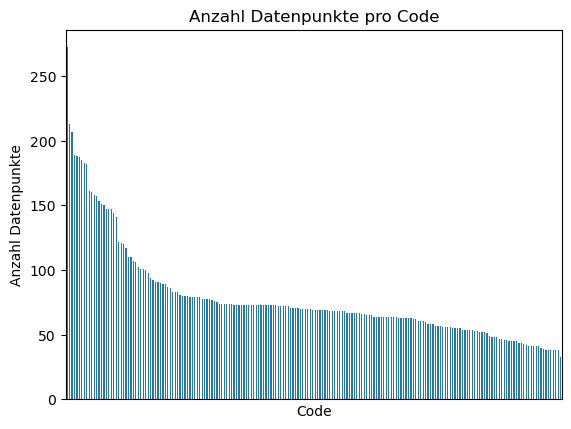

In [2089]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [2090]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  272


In [2091]:
# Anzahl Datenpunkte pro Jahr
df['Jahr'].value_counts().sort_index()


Jahr
1751      1
1752      1
1753      1
1754      1
1755      1
       ... 
2018    232
2019    232
2020    232
2021    232
2022    232
Name: count, Length: 272, dtype: int64

In [2092]:
total_countries = len(df['Gebiet'].unique())

years_with_all_countries = df['Jahr'].value_counts()
years_with_all_countries = years_with_all_countries[years_with_all_countries == total_countries]
years_with_all_countries = years_with_all_countries.sort_index()
earliest_date = years_with_all_countries.index.min()
print("Jahre, in denen alle Länder erfasst wurden:")
print(years_with_all_countries)
print("Das früheste Jahr, in dem alle Länder erfasst wurden:", earliest_date)

Jahre, in denen alle Länder erfasst wurden:
Jahr
1990    233
1991    233
1992    233
1993    233
1994    233
1995    233
1996    233
1997    233
1998    233
1999    233
2000    233
2001    233
2002    233
2003    233
2004    233
2005    233
2006    233
2007    233
2008    233
2009    233
2010    233
Name: count, dtype: int64
Das früheste Jahr, in dem alle Länder erfasst wurden: 1990


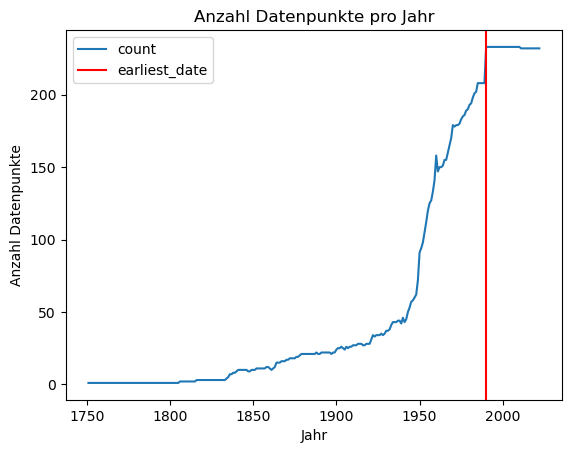

In [2093]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=earliest_date, color='red',label='earliest_date') # rote Linie bei 1990 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Kindersterblichkeitsrate

In [2094]:
df.describe()

,Jahr,Unter 5 Sterblichkeitsrate
count,17183.000000,17183.000000
mean,1975.538963,10.386308
std,40.212128,10.398669
min,1751.000000,0.146058
25%,1961.000000,2.173641
50%,1985.000000,6.395330
75%,2004.000000,16.118613
max,2022.000000,68.208000


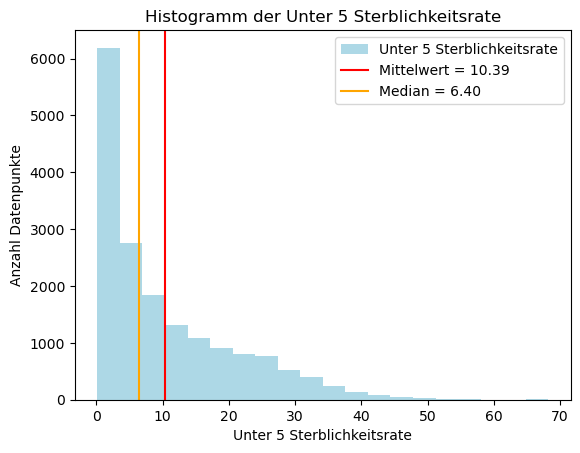

In [2095]:
g = df['Unter 5 Sterblichkeitsrate'].plot(kind='hist', bins=20, color='lightblue', title='Histogramm der Unter 5 Sterblichkeitsrate', 
 xlabel='Unter 5 Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Unter 5 Sterblichkeitsrate'].mean()
g.axvline(x=df['Unter 5 Sterblichkeitsrate'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Unter 5 Sterblichkeitsrate'].median()
g.axvline(x=df['Unter 5 Sterblichkeitsrate'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()


## 4. Analyse 

### Beobachtungen

- Länder wie Dominica, Fiji, Venezuela, Lebanon, Palau, Cuba und Grenada zeigen entweder eine stagnierende oder leicht positive Veränderung in der Lebenserwartung. Diese Gebiete könnten von stabileren politischen und sozialen Bedingungen oder von Verbesserungen im Gesundheitswesen profitiert haben.

- Afrikanische Länder wie Sierra Leone, Somalia, Angola, Chad und Burkina Faso zeigen deutliche Rückgänge in der Lebenserwartung, die teils über -4 Jahre liegen. Diese negativen Veränderungen könnten auf Faktoren wie politische Instabilität, bewaffnete Konflikte, Wirtschaftskrisen, Epidemien (z. B. Ebola in Sierra Leone).




### Interpretation

- In Sierra Leone stieg die Kindersterblichkeit 2015 wegen der Ebola-Epidemie (2014–2016), die das Gesundheitssystem überforderte. https://de.wikipedia.org/wiki/Ebolafieber-Epidemie_2014_bis_2016

- Ab 2007 begann die Kindersterblichkeit in Somalia durch die Einführung von EPHS, einem Programm zur Verbesserung der Gesundheitsversorgung kontinuierlich zu sinken. https://somalilandsun.com/somaliland-essential-health-services-package-ephs-report/
https://www.who.int/emergencies/situations/ebola-outbreak-2014-2016-West-Africa

- Im Jahr 1996 fand eine Friedenskomission, bei dem die Kindersterblichkeitsrate begann kontinuierlich zu sinken. der Bürgerkrieg dauerte in Angola bis 2002. https://www.bpb.de/kurz-knapp/hintergrund-aktuell/505507/vor-20-jahren-ende-des-buergerkriegs-in-angola/

### Berechnungen

In [2096]:
diffs = df_pivot[2022]-df_pivot[2012]   # Differenz zwischen 2022 und 2012
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Sierra Leone   -4.675695
Somalia        -4.010715
Angola         -3.737656
Chad           -3.686804
Burkina Faso   -3.314599
                  ...   
Palau           0.265259
Lebanon         0.502895
Venezuela       0.676667
Fiji            0.701049
Dominica        0.754504
Length: 232, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Lebenserwartung 2011-2021'}, ylabel='Gebiet'>

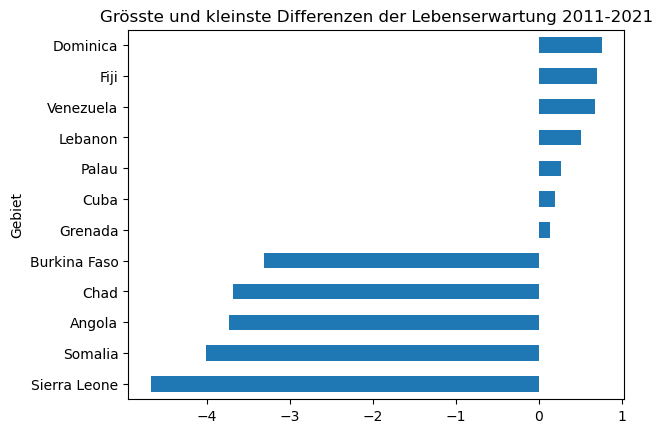

In [2097]:
diff_sel = (diffs < -3.3) | (diffs > 0.1)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Lebenserwartung 2011-2021')

In [2098]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Sierra Leone', 'Somalia', 'Angola', 'Chad', 'Burkina Faso', 'Grenada', 'Cuba', 'Palau', 'Lebanon', 'Venezuela', 'Fiji', 'Dominica']


### Visualisierung

Text(1994.5, 35, 'EPHS durch UNICEF')

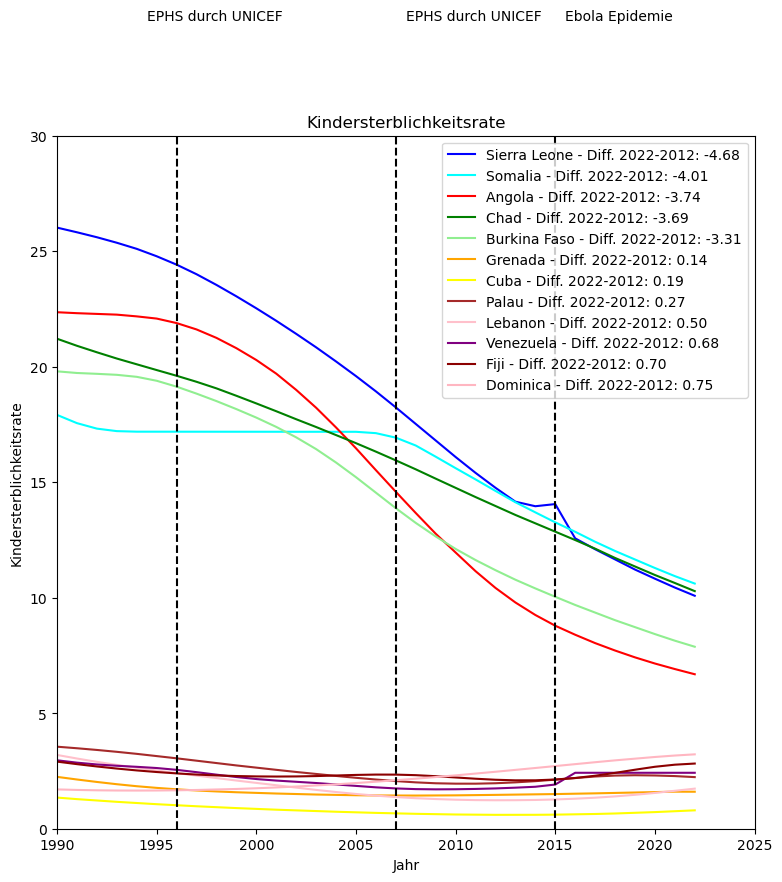

In [2099]:
color_dict = {
    'Sierra Leone': 'blue',
    'Somalia': 'cyan',
    'Grenada': 'orange',
    'Cuba': 'yellow',
    'Palau': 'brown',
    'Lebanon': 'pink',
    'Venezuela': 'purple',
    'Fiji': 'darkred',
    'Dominica': 'lightpink',
    'Angola': 'red', 
    'Burkina Faso': 'lightgreen',
    'Chad': 'green'
    
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title="Kindersterblichkeitsrate", xlabel="Jahr", ylabel=f"Kindersterblichkeitsrate", legend=True,
                                  label=f"{gebiet} - Diff. 2022-2012: {diff:.2f}", # für die Legende
                                  xlim=[1990,2025], ylim=[0,30],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(9,9))                   # Grösse des Plots

# Ebola Epidemie    
g.axvline(x=2015, color='black', linestyle='--') 
g.text(2015.5, 35, 'Ebola Epidemie')  

# EPHS
g.axvline(x=2007, color='black', linestyle='--')  
g.text(2007.5, 35, 'EPHS durch UNICEF')

# Angola
g.axvline(x=1996, color='black', linestyle='--')  
g.text(1994.5, 35, 'EPHS durch UNICEF')

### 5. Wie hat sich die Kindersterblichkeitsrate weltweit über die Jahrzente entwickelt?
- Die Analysierung zeigt mehrheitlich eine Senkung der Kindersterblichkeit über die Jahrzehnte, jedoch hat es die ersten 100 Jahren am Anfang leichte Schwankungen.
- Ab 1940 hat die Kindersterblichkeit kontinuierlich abgenommen.
- Im Jahr 1770 war die Kindersterblichkeitsrate am höchsten.
- Im Jahr 2020 war die Kindersterblichkeitsrate am tiefsten.

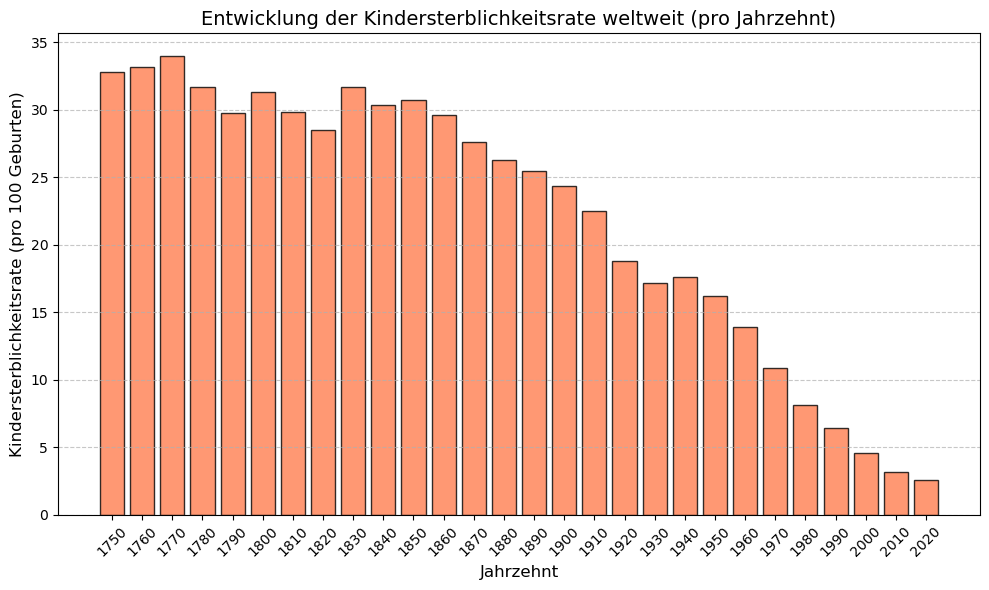

In [2100]:
# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Jahr'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Unter 5 Sterblichkeitsrate'].mean()

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(decade_avg.index, decade_avg.values, width=8, color='coral', edgecolor='black', alpha=0.8)

# Diagramm
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


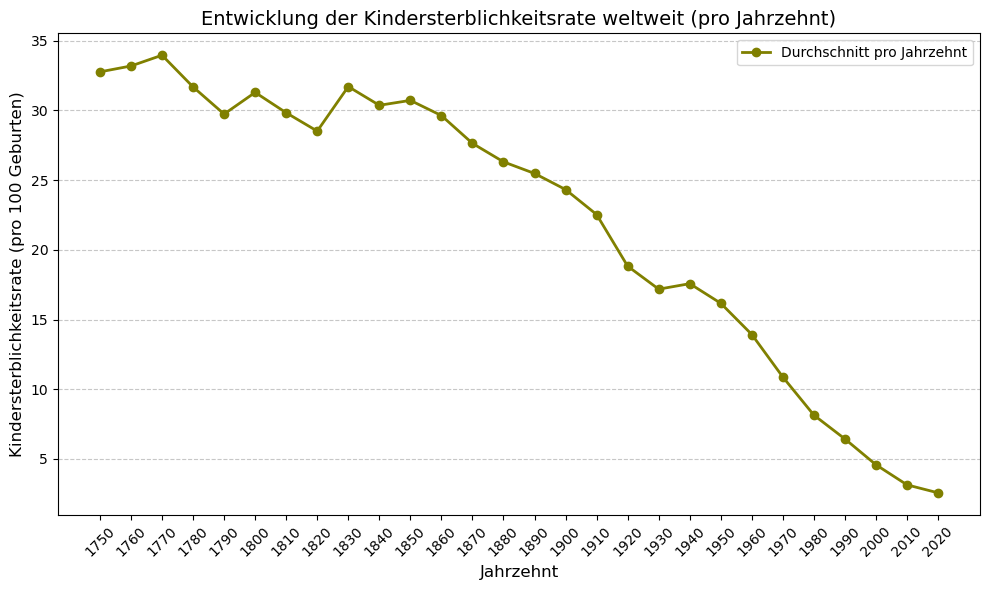

In [2101]:
# Neue Spalte "Decade" hinzufügen (Jahrzehnte)
df['Decade'] = (df['Jahr'] // 10) * 10

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
decade_avg = df.groupby('Decade')['Unter 5 Sterblichkeitsrate'].mean()

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(decade_avg.index, decade_avg.values, marker='o', color='olive', linestyle='-', linewidth=2, label='Durchschnitt pro Jahrzehnt')

# Diagramm
plt.title('Entwicklung der Kindersterblichkeitsrate weltweit (pro Jahrzehnt)', fontsize=14)
plt.xlabel('Jahrzehnt', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.xticks(decade_avg.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

### 6. Welche Länder haben die höchste bzw. niedrigste Kindersterblichkeitsrate im Jahr 2022?
- San Marino, Estonia, Singapore, Norway und Japan haben die niedrigste Sterblichkeitsrate im Jahr 2022
- Niger, Nigeria, Somalia, Chad und Sierra Leone haben die höchste Sterblichkeitsrate im Jahr 2022
- Das Land mit der höchsten Kindersterblichkeitsrate ist Niger und mit der tiefsten ist San Marino.
- In San Marino sind es ca. 0.1 Todesfälle pro 100 Lebendgeburten im Jahr 2022.
- In Niger sind es ca. 11.7 Todesfälle pro 100 Lebendgeburten im Jahr 2022.


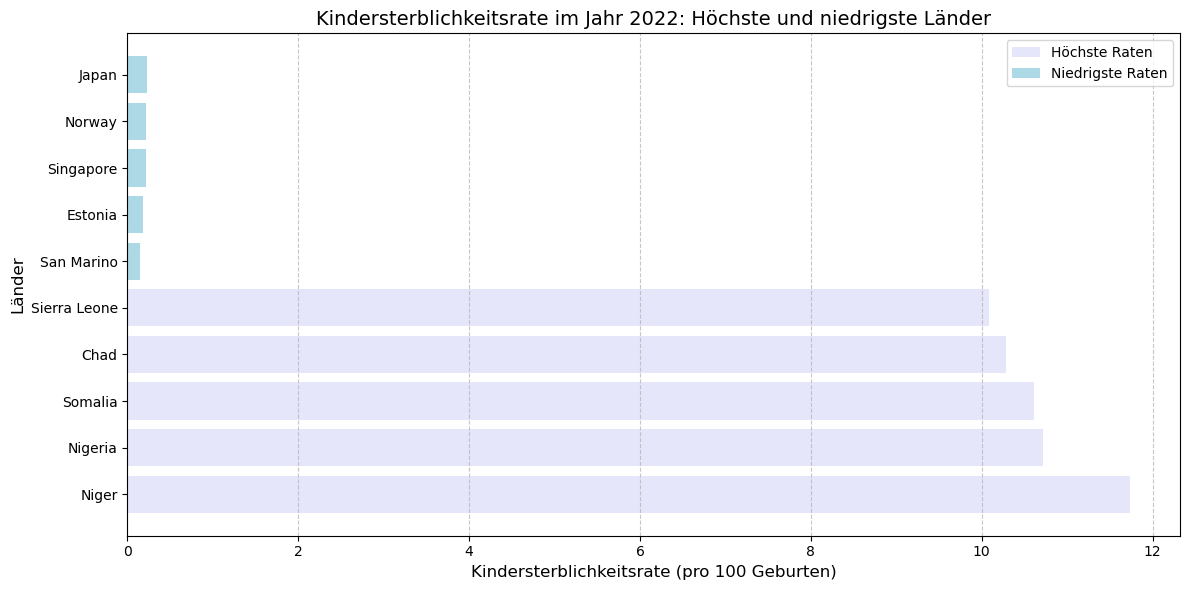

Länder mit der höchsten Kindersterblichkeitsrate im Jahr 2022:
             Gebiet  Unter 5 Sterblichkeitsrate
10950         Niger                   11.734437
11008       Nigeria                   10.717279
13985       Somalia                   10.613298
2981           Chad                   10.285629
13596  Sierra Leone                   10.084661

Länder mit der niedrigsten Kindersterblichkeitsrate im Jahr 2022:
           Gebiet  Unter 5 Sterblichkeitsrate
13225  San Marino                    0.146058
4774      Estonia                    0.188061
13685   Singapore                    0.215215
11551      Norway                    0.216749
7923        Japan                    0.227614


In [2102]:
# Daten des neuesten Jahres extrahieren
latest_year = int(df['Jahr'].max())
latest_data = df[df['Jahr'] == latest_year]

# Länder mit der höchsten und niedrigsten Kindersterblichkeitsrate
highest_mortality = latest_data.nlargest(5, 'Unter 5 Sterblichkeitsrate')  # Top 5 mit höchster Rate
lowest_mortality = latest_data.nsmallest(5, 'Unter 5 Sterblichkeitsrate')  # Top 5 mit niedrigster Rate

# Daten für die Visualisierung vorbereiten
highest_data = highest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']]
lowest_data = lowest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']]

# Visualisierung: Balkendiagramm
plt.figure(figsize=(12, 6))

# Balken für höchste Kindersterblichkeitsraten
plt.barh(highest_data['Gebiet'], highest_data['Unter 5 Sterblichkeitsrate'], color='lavender', label='Höchste Raten')

# Balken für niedrigste Kindersterblichkeitsraten
plt.barh(lowest_data['Gebiet'], lowest_data['Unter 5 Sterblichkeitsrate'], color='lightblue', label='Niedrigste Raten')

# Diagramm
plt.title(f'Kindersterblichkeitsrate im Jahr {latest_year}: Höchste und niedrigste Länder', fontsize=14)
plt.xlabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.ylabel('Länder', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Länder mit der höchsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(highest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']])

print(f"\nLänder mit der niedrigsten Kindersterblichkeitsrate im Jahr {latest_year}:")
print(lowest_mortality[['Gebiet', 'Unter 5 Sterblichkeitsrate']])

### 7. Bei welchen Ländern steigt die Kindersterblichkeitrate?

### Beobachtung
- Rwanda weist mit Abstand den höchsten Anstieg in der Kindersterblichkeitsrate auf, der deutlich über allen anderen Ländern liegt.
- Länder wie North Korea, Haiti, und Eswatini zeigen ebenfalls signifikante Anstiege, wenn auch weit unter dem Niveau von Rwanda.
- Die Länder stammen aus verschiedenen Regionen der Welt, darunter Afrika, Asien, Europa und die Karibik.


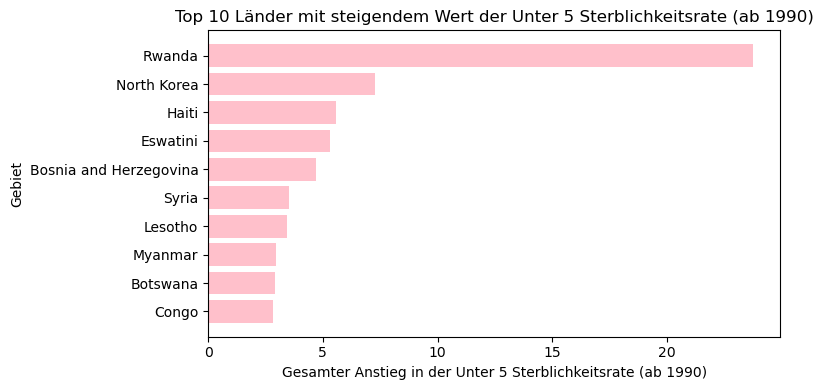

In [2103]:
# Sortiere nach Gebiet und Jahr
df = df.sort_values(by=['Gebiet', 'Jahr'])

# Filter: Daten ab dem Jahr 1990
df_filtered = df[df['Jahr'] >= 1990].copy()

# Berechne die Differenz zwischen aufeinanderfolgenden Jahren
df_filtered['Anstieg'] = df_filtered.groupby('Gebiet')['Unter 5 Sterblichkeitsrate'].diff()

# Filter: Nur positive Anstiege (Werte, die gestiegen sind)
df_increase = df_filtered[df_filtered['Anstieg'] > 0]

# Summiere die Anstiege für jedes Gebiet (gesamt ab 1990)
df_summary = df_increase.groupby('Gebiet').agg(
    Gesamter_Anstieg=('Anstieg', 'sum')
).sort_values(by='Gesamter_Anstieg', ascending=False)

# Visualisierung der Top 10 Länder mit dem höchsten Gesamten Anstieg ab 1990
plt.figure(figsize=(8, 4))
plt.barh(df_summary.head(10).index, df_summary['Gesamter_Anstieg'].head(10), color='pink')
plt.xlabel('Gesamter Anstieg in der Unter 5 Sterblichkeitsrate (ab 1990)')
plt.ylabel('Gebiet')
plt.title('Top 10 Länder mit steigendem Wert der Unter 5 Sterblichkeitsrate (ab 1990)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 8. Vergleich Niger (höchste Kindersterblichkeitsrate in Jahr 2022) und Rwanda (höchster Anstieg der Kindersterblichkeitsrate ab 1990)
#### Beobachtungen
***1. Allgemeiner Trend***
- Sowohl Niger als auch Rwanda zeigen einen kontinuierlichen Rückgang der Kindersterblichkeitsrate von 1990 bis 2022.

***2. Vergleich zwischen Niger und Rwanda***
- Niger startet 1990 mit einer deutlich höheren Kindersterblichkeitsrate als Rwanda (über 25 pro 100 Geburten im Vergleich zu etwas über 20).
- Der Rückgang in Rwanda ist steiler, sodass das Land 2020 eine deutlich niedrigere Kindersterblichkeitsrate erreicht hat (unter 5 pro 100 Geburten), während Niger im selben Jahr immer noch über 10 pro 100 Geburten liegt.

***3. Verlauf***
- Beide Länder zeigen ab etwa 2010 ein langsameres Tempo beim Rückgang, wobei Rwanda das niedrigere Niveau beibehält.


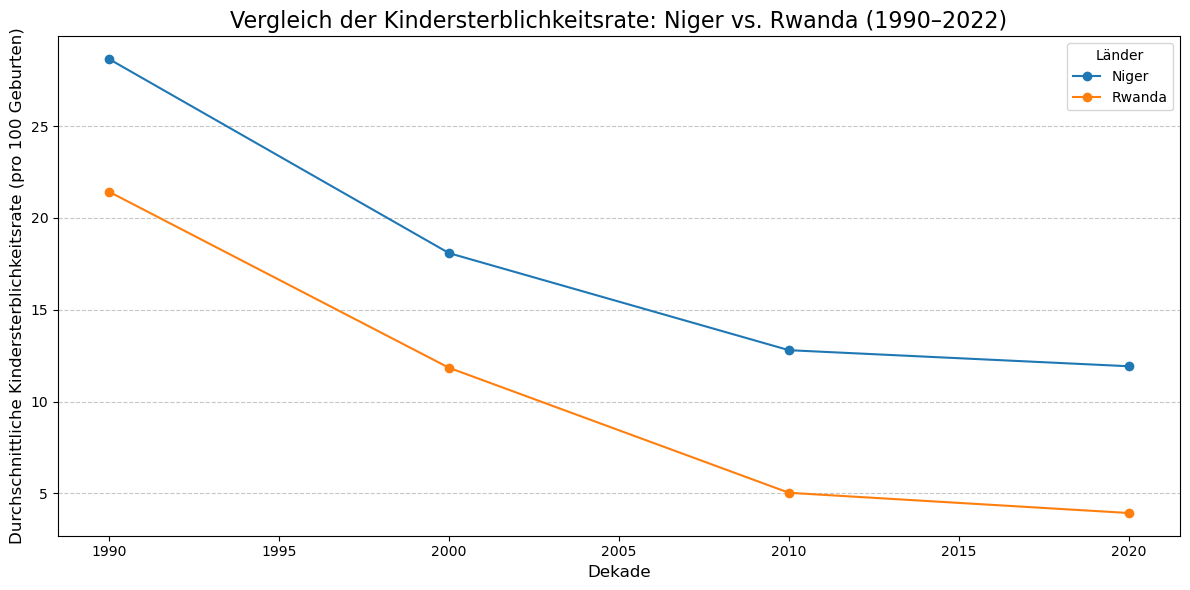

In [2104]:
# Sortiere nach Gebiet und Jahr
df = df.sort_values(by=['Gebiet', 'Jahr'])

# Filter: Nur Daten für Rwanda und Niger zwischen 1990 und 2022
df_filtered = df[
    (df['Gebiet'].isin(['Niger', 'Rwanda'])) & 
    (df['Jahr'] >= 1990) & 
    (df['Jahr'] <= 2022)
].copy()  # .copy() erstellt eine explizite Kopie des gefilterten DataFrames

# Gruppiere nach Jahrzehnten (alle 10 Jahre)
df_filtered['Dekade'] = (df_filtered['Jahr'] // 10) * 10

# Durchschnittliche Kindersterblichkeitsrate pro Dekade berechnen
df_decade = df_filtered.groupby(['Gebiet', 'Dekade']).agg(
    Durchschnittliche_Sterblichkeitsrate=('Unter 5 Sterblichkeitsrate', 'mean')
).reset_index()

# Visualisierung: Vergleich der Kindersterblichkeitsrate
plt.figure(figsize=(12, 6))

# Für jedes Land eine Linie plotten
countries = ['Niger', 'Rwanda']
for country in countries:
    country_data = df_decade[df_decade['Gebiet'] == country]
    plt.plot(
        country_data['Dekade'], 
        country_data['Durchschnittliche_Sterblichkeitsrate'], 
        marker='o', label=country
    )

# Diagramm anpassen
plt.title('Vergleich der Kindersterblichkeitsrate: Niger vs. Rwanda (1990–2022)', fontsize=16)
plt.xlabel('Dekade', fontsize=12)
plt.ylabel('Durchschnittliche Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.legend(title="Länder", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


### 9. Welche Regionen zeigen den grössten bzw. schwächsten Rückgang in der Kindersterblichkeits?

- Die Visualisierung zeigt, das Barbados den stärksten Rückgang der Kindersterblichkeitsrate hat. 
- Northern America hat den schwächsten Rückgang der Kindersterblichkeitsrate.
- In Barbados beträgt der Rückgang 67 Todesfälle pro 100 Lebendgeburten.
- In Northern America beträgt der Rückgang 0.48 Todesfälle pro 100 Lebendgeburten.

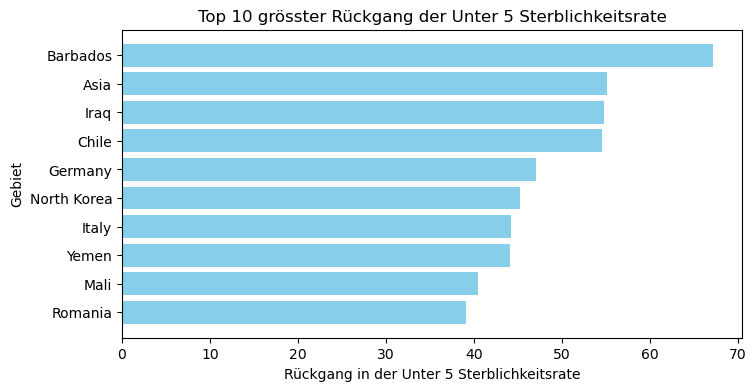

In [2105]:
# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Gebiet
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

df_filtered = df[df['Jahr'] >= 1990]  # Nur Daten ab 1990

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang und die Top 10 länder auswählen
df_diff_sorted = df_diff.sort_values(by='Rueckgang', ascending=False).head(10)

# Visualisierung der grössten Rückgänge (Top 10)
plt.figure(figsize=(8, 4))
plt.barh(df_diff_sorted.index, df_diff_sorted['Rueckgang'], color='skyblue')
plt.xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
plt.ylabel('Gebiet')
plt.title('Top 10 grösster Rückgang der Unter 5 Sterblichkeitsrate')
plt.gca().invert_yaxis()  # Um die höchsten Werte oben anzuzeigen
plt.show()

In [2106]:
# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Gebiet
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

df_filtered = df[df['Jahr'] >= 1990]  # Nur Daten ab 1990

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang
df_diff_sorted = df_diff.sort_values(by='Rueckgang', ascending=False)

# Regionen mit dem größten und schwächsten Rückgang anzeigen
groesster_rueckgang = df_diff_sorted.head(1)
schwaechster_rueckgang = df_diff_sorted.tail(1)

print("Region mit dem grössten Rückgang:")
print(groesster_rueckgang)

print("\nRegion mit dem schwächsten Rückgang:")
print(schwaechster_rueckgang)

Region mit dem grössten Rückgang:
          Startjahr  Endjahr  Startwert   Endwert  Rueckgang
Gebiet                                                      
Barbados       1906     2022     68.208  1.087135  67.120865

Region mit dem schwächsten Rückgang:
                        Startjahr  Endjahr  Startwert   Endwert  Rueckgang
Gebiet                                                                    
Northern America (SDG)       1990     2022   1.094595  0.613152   0.481442


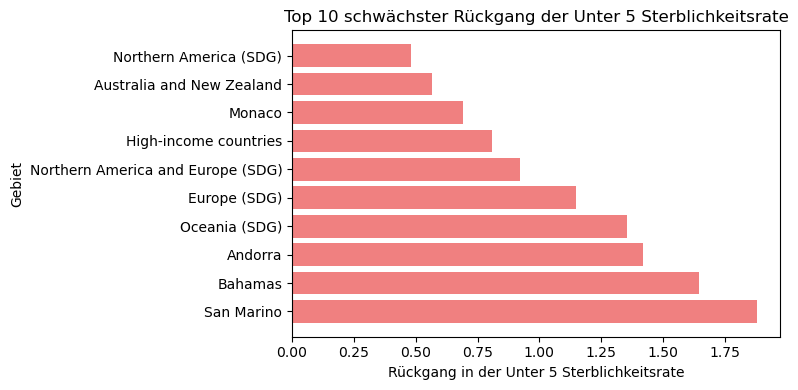

In [2107]:
# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Gebiet
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

df_filtered = df[df['Jahr'] >= 1990]  # Nur Daten ab 1990

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang (ascending=True für schwächsten Rückgang) und die Top 10 Länder auswählen
df_diff_sorted = df_diff.sort_values(by='Rueckgang', ascending=True).head(10)

# Visualisierung der schwächsten Rückgänge (Top 10)
plt.figure(figsize=(8, 4))
plt.barh(df_diff_sorted.index, df_diff_sorted['Rueckgang'], color='lightcoral')
plt.xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
plt.ylabel('Gebiet')
plt.title('Top 10 schwächster Rückgang der Unter 5 Sterblichkeitsrate')
plt.gca().invert_yaxis()  # Um die niedrigsten Werte oben anzuzeigen
plt.tight_layout()
plt.show()


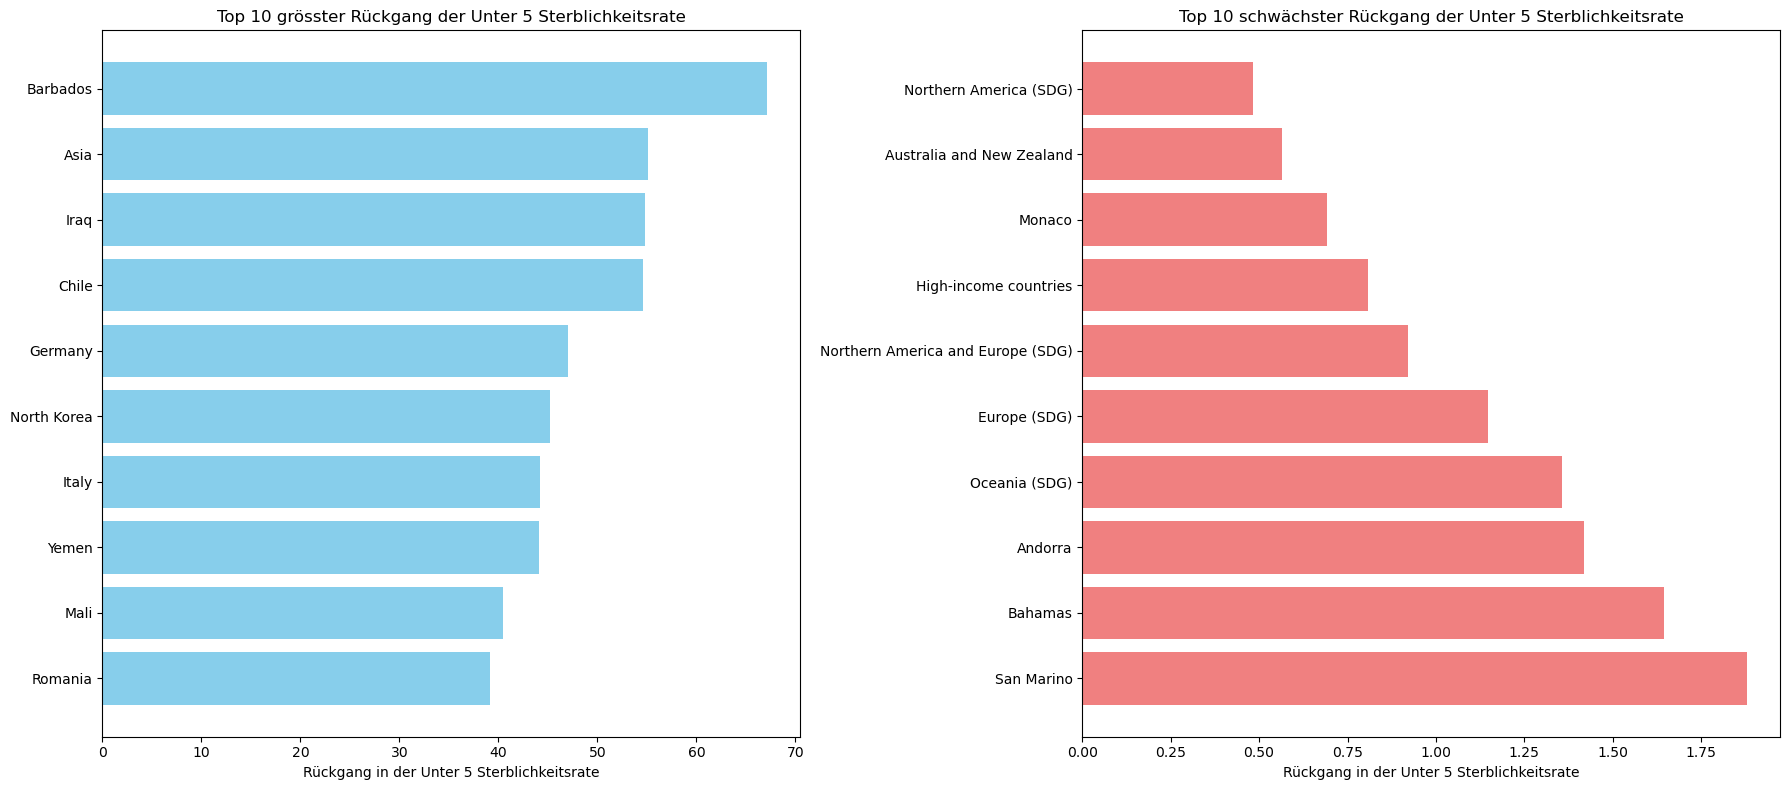

In [2108]:

# Berechne den Unterschied zwischen dem ersten und letzten Jahr je Entity
df_diff = df.groupby('Gebiet').agg(
    Startjahr=('Jahr', 'min'),
    Endjahr=('Jahr', 'max'),
    Startwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[0]),
    Endwert=('Unter 5 Sterblichkeitsrate', lambda x: x.iloc[-1])
)

df_filtered = df[df['Jahr'] >= 1990]  # Nur Daten ab 1990

# Rückgang berechnen (Startwert - Endwert)
df_diff['Rueckgang'] = df_diff['Startwert'] - df_diff['Endwert']

# Sortieren nach Rückgang und die Top 10 und schwächsten 10 auswählen
top_10 = df_diff.sort_values(by='Rueckgang', ascending=False).head(10)
schwaechste_10 = df_diff.sort_values(by='Rueckgang', ascending=True).head(10)

# Visualisierung der Top 10 und schwächsten 10 Rückgänge
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Top 10 Rückgänge
ax[0].barh(top_10.index, top_10['Rueckgang'], color='skyblue')
ax[0].set_title('Top 10 grösster Rückgang der Unter 5 Sterblichkeitsrate')
ax[0].set_xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
ax[0].invert_yaxis()

# Schwächste 10 Rückgänge
ax[1].barh(schwaechste_10.index, schwaechste_10['Rueckgang'], color='lightcoral')
ax[1].set_title('Top 10 schwächster Rückgang der Unter 5 Sterblichkeitsrate')
ax[1].set_xlabel('Rückgang in der Unter 5 Sterblichkeitsrate')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

### 10. Analyse der Kindersterblichkeit: Verknüpfung von Visualisierung und Zahlen"

Die zusätzlichen Zahlen zur Kindersterblichkeit verdeutlichen die Tragweite der Situation in den betroffenen Ländern. 2015 starben in Sierra Leone 35.272 Kinder unter fünf Jahren, 2007 waren es in Somalia 87.348 und 1996 in Angola 147.169. Diese erschütternden Zahlen untermauern die in der Visualisierung beobachteten Trends und zeigen, wie stark Krisen wie die Ebola-Epidemie, anhaltende Konflikte und instabile Gesundheitssysteme das Leben von Kindern in diesen Regionen gefährden

In [2109]:
import pandas as pd
from matplotlib import pyplot as plt

In [2110]:
# loading the data
df = pd.read_csv('child-deaths-igme-data.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Anzahl der Todesfälle bei Kindern unter fünf Jahren']) 
df.head()

,Gebiet,Code,Jahr,Anzahl der Todesfälle bei Kindern unter fünf Jahren
0,Afghanistan,AFG,1968,154615
1,Afghanistan,AFG,1969,155704
2,Afghanistan,AFG,1970,156757
3,Afghanistan,AFG,1971,157792
4,Afghanistan,AFG,1972,158626


In [2111]:
# Sierra Leone im Jahr 2015
filtered_data_sierra_leone = df[(df['Gebiet'] == 'Sierra Leone') & (df['Jahr'] == 2015)]
if not filtered_data_sierra_leone.empty:
    deaths_sierra_leone = filtered_data_sierra_leone['Anzahl der Todesfälle bei Kindern unter fünf Jahren'].values[0]
    print(f"Im Jahr 2015 starben in Sierra Leone {deaths_sierra_leone} Kinder unter fünf Jahren.")

# Somalia im Jahr 2007
filtered_data_somalia = df[(df['Gebiet'] == 'Somalia') & (df['Jahr'] == 2007)]
if not filtered_data_somalia.empty:
    deaths_somalia = filtered_data_somalia['Anzahl der Todesfälle bei Kindern unter fünf Jahren'].values[0]
    print(f"Im Jahr 2007 starben in Somalia {deaths_somalia} Kinder unter fünf Jahren.")

# Angola im Jahr 1996
filtered_data_angola = df[(df['Gebiet'] == 'Angola') & (df['Jahr'] == 1996)]
if not filtered_data_angola.empty:
    deaths_angola = filtered_data_angola['Anzahl der Todesfälle bei Kindern unter fünf Jahren'].values[0]
    print(f"Im Jahr 1996 starben in Angola {deaths_angola} Kinder unter fünf Jahren.")


Im Jahr 2015 starben in Sierra Leone 35272 Kinder unter fünf Jahren.
Im Jahr 2007 starben in Somalia 87348 Kinder unter fünf Jahren.
Im Jahr 1996 starben in Angola 147169 Kinder unter fünf Jahren.


### 11. Wie unterscheiden sich die Kindersterblichkeitsraten zwischen einkommensstarken und einkommensschwachen Ländern?

In [2112]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('child-mortality-by-income-level-of-country.csv')


print(data.columns)


Index(['Entity', 'Code', 'Year',
       'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'],
      dtype='object')


In [2113]:
# Umbenennen der Spalten für mehr Klarheit
df.rename(columns={
    'Entity': 'Gebiet',
    'Year': 'Jahr',
    'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Kindersterblichkeitsrate'
}, inplace=True)

# Filter: Einkommensstarke und einkommensschwache Länder
high_income = df[df['Gebiet'] == 'High-income countries']
low_income = df[df['Gebiet'] == 'Low-income countries']  # Ersetzen Sie diesen Namen, falls er in Ihrer Datei anders lautet

# Ermittlung des ersten erfassten Jahres für jede Gruppe
high_income_start_year = high_income['Jahr'].min()
low_income_start_year = low_income['Jahr'].min()

# Ausgabe der Ergebnisse
print(f"Erste Erfassung für einkommensstarke Länder: {high_income_start_year}")
print(f"Erste Erfassung für einkommensschwache Länder: {low_income_start_year}")


Erste Erfassung für einkommensstarke Länder: 1990
Erste Erfassung für einkommensschwache Länder: 1990


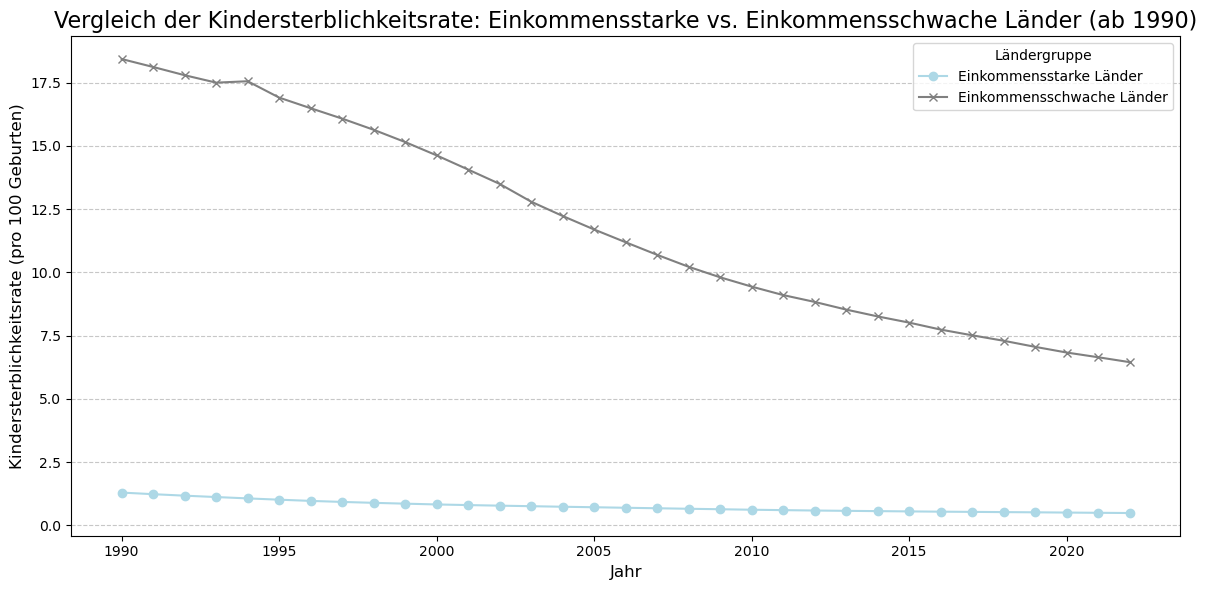

In [2114]:
# Laden der Daten (ersetzen Sie 'file.csv' mit Ihrem tatsächlichen Dateipfad)
df = pd.read_csv('child-mortality-by-income-level-of-country.csv')

# Umbenennen der Spalten für mehr Klarheit
df.rename(columns={
    'Entity': 'Gebiet',
    'Year': 'Jahr',
    'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Kindersterblichkeitsrate'
}, inplace=True)

# Filter: Daten ab 1990
df_filtered = df[df['Jahr'] >= 1990]

# Filter: Einkommensstarke und einkommensschwache Länder
high_income = df_filtered[df_filtered['Gebiet'] == 'High-income countries']
low_income = df_filtered[df_filtered['Gebiet'] == 'Low-income countries']

# Gruppieren nach Jahr und Berechnung des Durchschnitts
high_income_avg = high_income.groupby('Jahr')['Kindersterblichkeitsrate'].mean().reset_index()
low_income_avg = low_income.groupby('Jahr')['Kindersterblichkeitsrate'].mean().reset_index()

# Visualisierung
plt.figure(figsize=(12, 6))

# Einkommensstarke Länder
plt.plot(high_income_avg['Jahr'], high_income_avg['Kindersterblichkeitsrate'], label='Einkommensstarke Länder', marker='o', color='lightblue')

# Einkommensschwache Länder
plt.plot(low_income_avg['Jahr'], low_income_avg['Kindersterblichkeitsrate'], label='Einkommensschwache Länder', marker='x', color='grey')

# Diagramm anpassen
plt.title('Vergleich der Kindersterblichkeitsrate: Einkommensstarke vs. Einkommensschwache Länder (ab 1990)', fontsize=16)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=12)
plt.legend(title="Ländergruppe", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()


***1. Globaler Überblick***
- Der erste Datensatz (child-mortality.csv) liefert globale Daten zur Kindersterblichkeitsrate (alle Länder), während der zweite Datensatz spezifische Daten für Einkommensgruppen enthält (einkommensstarke und einkommensschwache Länder).
- Die Fusion dieser beiden Datensätze ermöglicht den Vergleich zwischen spezifischen Einkommensgruppen und dem globalen Durchschnitt.

***2. Ergänzung durch Einkommensdaten***
- Der zweite Datensatz fügt eine wichtige Dimension hinzu: die Unterteilung in „einkommensstarke“ und „einkommensschwache“ Länder. Dadurch wird sichtbar, wie sich die Kindersterblichkeitsrate je nach Einkommensniveau unterscheidet.

***3. Ergebnisse der Fusionierung***
- Die globale Linie (Durchschnitt aller Länder) liegt erwartungsgemäss zwischen den Linien für einkommensstarke und einkommensschwache Länder.

***4. Vorteil der Fusionierung***
- Die Fusion ermöglicht eine detaillierte Analyse. Neben dem globalen Trend können gezielte Vergleiche zwischen den Einkommensgruppen durchgeführt werden.
Ohne die Einkommensdaten wäre der Unterschied zwischen den Gruppen nicht so klar ersichtlich.

***5. Veränderungen über Jahrzehnte***
- Der zusätzliche Einblick in die Entwicklung der Kindersterblichkeitsrate pro Jahrzehnt zeigt nicht nur Trends in spezifischen Gruppen, sondern verdeutlicht auch, wie globale Verbesserungen unterschiedlich schnell in verschiedenen Einkommensgruppen greifen.

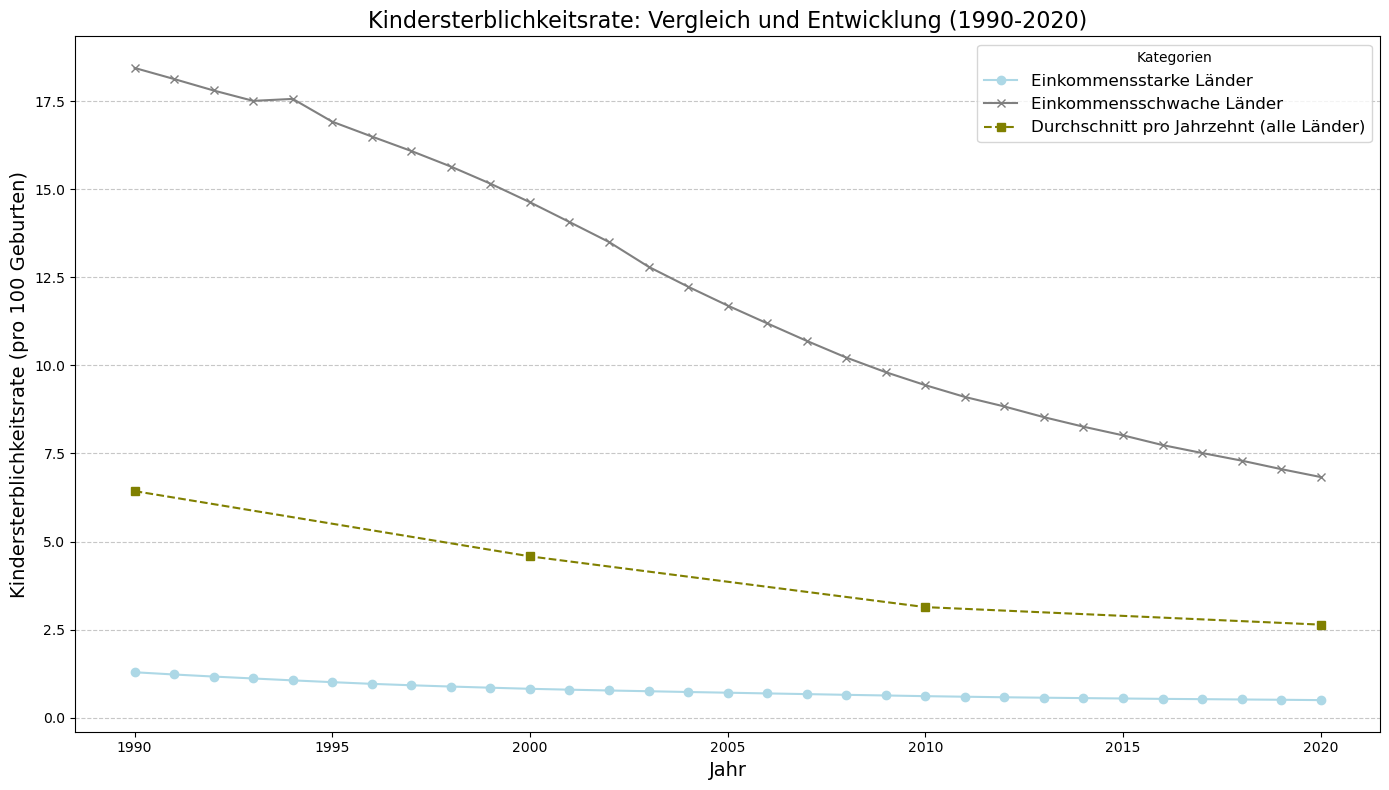

In [2117]:
import pandas as pd
import matplotlib.pyplot as plt

# Datei 1: child-mortality.csv laden
df_all = pd.read_csv('child-mortality.csv', skiprows=1, 
                     names=['Gebiet', 'Code', 'Jahr', 'Kindersterblichkeitsrate'])

# Datei 2: child-mortality-by-income-level-of-country.csv laden
df_income = pd.read_csv('child-mortality-by-income-level-of-country.csv')

# Umbenennen der Spalten in Datei 2 für mehr Klarheit
df_income.rename(columns={
    'Entity': 'Gebiet',
    'Year': 'Jahr',
    'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Kindersterblichkeitsrate'
}, inplace=True)

# Filter: Daten von 1990 bis 2020
years = list(range(1990, 2021))
df_all_filtered = df_all[df_all['Jahr'].isin(years)].copy()
df_income_filtered = df_income[df_income['Jahr'].isin(years)]

# Einkommensstarke und einkommensschwache Länder filtern
einkommens_schwach = df_income_filtered[df_income_filtered['Gebiet'] == 'Low-income countries']
einkommens_stark = df_income_filtered[df_income_filtered['Gebiet'] == 'High-income countries']

# Gruppieren nach Jahr und Berechnung des Durchschnitts
avg_all = df_all_filtered.groupby('Jahr')['Kindersterblichkeitsrate'].mean().reset_index()
avg_schwach = einkommens_schwach.groupby('Jahr')['Kindersterblichkeitsrate'].mean().reset_index()
avg_stark = einkommens_stark.groupby('Jahr')['Kindersterblichkeitsrate'].mean().reset_index()

# Kindersterblichkeitsrate pro Jahrzehnt berechnen
df_all_filtered['Decade'] = df_all_filtered['Jahr'].apply(lambda x: (x // 10) * 10)
decade_avg = df_all_filtered.groupby('Decade')['Kindersterblichkeitsrate'].mean().reset_index()

# Visualisierung
plt.figure(figsize=(14, 8))

# Einkommensstarke Länder
plt.plot(avg_stark['Jahr'], avg_stark['Kindersterblichkeitsrate'], label='Einkommensstarke Länder', marker='o', color='lightblue')

# Einkommensschwache Länder
plt.plot(avg_schwach['Jahr'], avg_schwach['Kindersterblichkeitsrate'], label='Einkommensschwache Länder', marker='x', color='grey')

# Durchschnitt pro Jahrzehnt (alle Länder)
plt.plot(decade_avg['Decade'], decade_avg['Kindersterblichkeitsrate'], label='Durchschnitt pro Jahrzehnt (alle Länder)', marker='s', color='olive', linestyle='--')

# Diagramm anpassen
plt.title('Kindersterblichkeitsrate: Vergleich und Entwicklung (1990-2020)', fontsize=16)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Kindersterblichkeitsrate (pro 100 Geburten)', fontsize=14)
plt.legend(title="Kategorien", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()
